# Part 4

## Import Packages used

In [1]:
#handling data manipulations
import pandas as pd
#handlling data computations
import numpy as np

#for normalization of categorical variables
from sklearn.preprocessing import LabelEncoder
#for normalization of numerical variables
from sklearn.preprocessing import StandardScaler
# splitting dataset into training and testing set
from sklearn.model_selection import train_test_split

#for data splitting into train and validation sets
from sklearn.model_selection import KFold
# finding the best parameter for a model
from sklearn.model_selection import cross_validate, cross_val_score

# linear classifier
from sklearn.linear_model import LogisticRegression
# Multilayer Perceptron classifier
from sklearn.neural_network import MLPClassifier

#metrics to evaluate a model
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

# remove warnings
import warnings
warnings.filterwarnings("ignore")

## Import data

In [2]:
df = pd.read_csv("train_data.csv")

## Data Preview

In [3]:
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


## removing Missing values

In [4]:
df.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [5]:
df1 = df.dropna()

In [6]:
df1.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

## Column selection for training

In [7]:
df1.columns

Index(['case_id', 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
       'patientid', 'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient', 'Age',
       'Admission_Deposit', 'Stay'],
      dtype='object')

In [8]:
#selected column to be used 
cols = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Available Extra Rooms in Hospital', 'Department', 'Ward_Type',
       'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness',
       'Visitors with Patient', 'Age', 'Admission_Deposit']

In [9]:
df1_a = df1[cols]

In [10]:
#To get a brief undrstanding of all the columns
df1_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 313793 entries, 0 to 318437
Data columns (total 12 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hospital_code                      313793 non-null  int64  
 1   Hospital_type_code                 313793 non-null  object 
 2   City_Code_Hospital                 313793 non-null  int64  
 3   Available Extra Rooms in Hospital  313793 non-null  int64  
 4   Department                         313793 non-null  object 
 5   Ward_Type                          313793 non-null  object 
 6   Ward_Facility_Code                 313793 non-null  object 
 7   Type of Admission                  313793 non-null  object 
 8   Severity of Illness                313793 non-null  object 
 9   Visitors with Patient              313793 non-null  int64  
 10  Age                                313793 non-null  object 
 11  Admission_Deposit                  3137

## Normalization

In [11]:
# column names of categorical variables
col_cat = ['Hospital_code', 'Hospital_type_code', 'City_Code_Hospital','Type of Admission',
          'Department', 'Ward_Type', 'Ward_Facility_Code', 'Age', 'Severity of Illness']

In [12]:
# column names of numerical variables
col_num = ['Available Extra Rooms in Hospital',
 'Visitors with Patient',
 'Admission_Deposit']

In [13]:
# create an empty dataframe and input the outputs of the normalization of categorical values into it
df2 = pd.DataFrame()
for i in col_cat:
    globals()['label_%s' %i.lower()] = LabelEncoder()
    df2[i] = globals()['label_%s' %i.lower()].fit_transform(df1[i].values)

In [14]:
#Data Preview
df2.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Type of Admission,Department,Ward_Type,Ward_Facility_Code,Age,Severity of Illness
0,7,2,2,0,3,2,5,5,0
1,1,2,4,1,3,3,5,5,0
2,9,4,0,1,1,3,4,5,0
3,25,1,1,1,3,2,3,5,0
4,25,1,1,1,3,3,3,5,0


In [15]:
# create an empty dataframe and input the outputs of the normalization of numerical values into it
df3 = pd.DataFrame()
df3['Age'] = df2['Age']

for i in col_num:
    globals()['std_%s' %i.lower()] = StandardScaler()
    df3[i] = globals()['std_%s' %i.lower()].fit_transform(np.array(df1[i].values).reshape(-1,1))
    
del df3['Age']

In [16]:
# normalization of the target variable into classes
le_target = LabelEncoder()
df3['Stay'] = le_target.fit_transform(df1['Stay'])

In [17]:
# joining the normalization outputs
df4 = pd.concat([df2,df3], axis=1)

In [18]:
# data preview of the normalized data
df4.head()

,Hospital_code,Hospital_type_code,City_Code_Hospital,Type of Admission,Department,Ward_Type,Ward_Facility_Code,Age,Severity of Illness,Available Extra Rooms in Hospital,Visitors with Patient,Admission_Deposit,Stay
0,7,2,2,0,3,2,5,5,0,-0.168178,-0.727035,0.026796,0
1,1,2,4,1,3,3,5,5,0,-1.024400,-0.727035,0.986987,4
2,9,4,0,1,1,3,4,5,0,-1.024400,-0.727035,-0.126025,3
3,25,1,1,1,3,2,3,5,0,-1.024400,-0.727035,2.200344,4
4,25,1,1,1,3,3,3,5,0,-1.024400,-0.727035,0.622427,4


## Data Selection for training

- I selected all the rows and all the columns except the last column for the features (input) 
- I selected all the rows and only the last column for the target which is the "Stay" column

In [19]:
X = df4.iloc[:,:-1] # features
y = df4.iloc[:,-1] # targets

## Cross validation for the linear classification model

In [20]:
# 10 fold cross validation
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# model to train
model_cv = LogisticRegression()
# metrics used in the crosss validation
scoring = ['accuracy','f1_macro','precision_macro', 'recall_macro']
# start the cross validation
scores = cross_validate(model_cv, X, y, scoring=scoring, cv=cv, n_jobs=-1)

In [21]:
scores['test_accuracy']

array([0.36255577, 0.36070746, 0.35882728, 0.35982664, 0.35753211,
       0.35941235, 0.35737277, 0.36250359, 0.35542879, 0.36113324])

###### - Inference

###### All 10 fold produced different but similar accuracy scores, 35% ~ 36% is a bad accuracy score for a model, so the model is not suitable for the data 

## Train test splitting of the dataset

In [22]:
# we set the size of the test set to be 30% of the main dataset
X_train, X_test, y_train, y_test = train_test_split( 
    X.values, y.values, test_size=0.3, random_state=0)

In [23]:
# model initialization
model = LogisticRegression()
# model training
model.fit(X_train, y_train)
# prediction
y_pred = model.predict(X_test)

In [24]:
print("The accuracy score is: " ,accuracy_score(y_test, y_pred))

The accuracy score is:  0.3618729949648389


###### - Inference

###### The accuracy score on unseen data is 36%, the model doesnt generalize well with the model. Being a linear model, this data is not linear separable.

## Multilayer Perceptron

### First experiment

In [111]:
# setting the mlp classifier arguments (parameters)
param_dict = {
    "hidden_layer_sizes":(100, 50, 25), #3 hidden layers with 100, 50 and 25 neurons for their layers
    "activation":'logistic', #logistic activation function
    "solver":'adam', #loss function
    "batch_size":70,
    "learning_rate":'adaptive',
    "verbose":True # show progress in training
}

In [112]:
# initialzing the mlp classifier
mlp = MLPClassifier(**param_dict)

In [113]:
mlp

MLPClassifier(activation='logistic', batch_size=70,
              hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
              verbose=True)

In [114]:
# mlp training
mlp.fit(X_train, y_train)

Iteration 1, loss = 1.69314151
Iteration 2, loss = 1.62383828
Iteration 3, loss = 1.60722089
Iteration 4, loss = 1.60101907
Iteration 5, loss = 1.59479951
Iteration 6, loss = 1.58809518
Iteration 7, loss = 1.58010502
Iteration 8, loss = 1.57426856
Iteration 9, loss = 1.57004126
Iteration 10, loss = 1.56698405
Iteration 11, loss = 1.56466800
Iteration 12, loss = 1.56266565
Iteration 13, loss = 1.56086548
Iteration 14, loss = 1.55938737
Iteration 15, loss = 1.55825401
Iteration 16, loss = 1.55688974
Iteration 17, loss = 1.55538078
Iteration 18, loss = 1.55445294
Iteration 19, loss = 1.55327177
Iteration 20, loss = 1.55218858
Iteration 21, loss = 1.55082017
Iteration 22, loss = 1.54848560
Iteration 23, loss = 1.54585245
Iteration 24, loss = 1.54332125
Iteration 25, loss = 1.54182271
Iteration 26, loss = 1.54112931
Iteration 27, loss = 1.54030322
Iteration 28, loss = 1.53964235
Iteration 29, loss = 1.53897759
Iteration 30, loss = 1.53833204
Iteration 31, loss = 1.53811501
Iteration 32, los

MLPClassifier(activation='logistic', batch_size=70,
              hidden_layer_sizes=(100, 50, 25), learning_rate='adaptive',
              verbose=True)

In [116]:

y_pred = mlp.predict(X_test)

In [117]:
# mlp prediction and evaluation
y_pred = mlp.predict(X_test)
print("The accuracy score is: " ,accuracy_score(y_test, y_pred), "\n")

The accuracy score is:  0.40482058254902376 



###### - Inference

###### MLP gave a better accuracy score, being a better classifier. MLP is a general purpose deep learning model so the accuracy can be built up upon, this doesnt mean the accuracy is good  40% accuracy is not near good in the health department

## MLP parameter tuning experiments

### Activation functions

In [127]:
# tested with 4 different activation functions and got the accuracy score
activations = ['tanh', 'logistic', 'relu', 'identity']
for i in activations:
    model = MLPClassifier(activation=i, max_iter=30)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} activation function is: ".format(i) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for tanh activation function is:  0.39865941490152756 

The accuracy score for logistic activation function is:  0.39075612398818754 

The accuracy score for relu activation function is:  0.39846820625039836 

The accuracy score for identity activation function is:  0.36388068580169536 



###### - Inference

###### Tanh had the best score giving accuracy score of 39.87% followed by 39.84% which is relu followed by logistic and identity activations

### Layers

In [128]:
# i used three different types of layers, 
layers = [(100,), (100, 50), (100, 50, 25)]
for i in layers:
    model = MLPClassifier(hidden_layer_sizes=i, max_iter=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} layer(s) is: ".format(len(i)) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for 1 layers is:  0.39945611761456584 

The accuracy score for 2 layers is:  0.39974293059125965 

The accuracy score for 3 layers is:  0.4051180182285581 



###### - Inference

###### The higher the number of hidden layers, the better the performance of the model. The shows that the data is highly non-linear, its a complex dataset. It not easy to model human life

### Learning rate

In [129]:
# i used 4 different learning rates in this experiment
rates = [0.01, 0.001, 0.0001, 0.00001]
for i in rates:
    model = MLPClassifier(solver='sgd',learning_rate_init=i, max_iter=50)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} learning rate is: ".format(i) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for 0.01 learning rate is:  0.39151033588986384 

The accuracy score for 0.001 learning rate is:  0.38424440714695446 

The accuracy score for 0.0001 learning rate is:  0.3685546750515201 

The accuracy score for 1e-05 learning rate is:  0.33684590707259554 



###### - Infernce

###### The best learning rate here was 0.01, with an accuracy of 39.15%, although this learning rate may prove to be worse in the long run, 50 epochs is not enough to draw conclusion that 0.01 is the best learning rate, more experiments needs to be done

### Epoch

In [131]:
epochs = [30, 50, 80, 150]
for i in epochs:
    model = MLPClassifier(max_iter=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} epochs is: ".format(i) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for 30 epochs is:  0.39656674244194695 

The accuracy score for 50 epochs is:  0.40092205060655633 

The accuracy score for 80 epochs is:  0.39817077057086403 

The accuracy score for 150 epochs is:  0.4004758970872549 



###### - Inference

###### The result gives us two things. 1, the higher the epochs, the bestter the result. 2, We should save the model from each iteration then pick the one with the best result. Apparently, this is the reason for callbacks which we can set to save the best model during training. After 50 epochs we got a 40.09% accuracy, 80 gave 39.81% (reduced) then 150 epochs gave 40.05%, we can still add more epochs to check if we can get better results.

### Momentum

In [132]:
momentums = [0.9, 0.7, 0.5, 0.3]
for i in momentums:
    model = MLPClassifier(solver='sgd',momentum=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} momentum is: ".format(i) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for 0.9 momentum is:  0.3977883532686057 

The accuracy score for 0.7 momentum is:  0.38836601584907265 

The accuracy score for 0.5 momentum is:  0.38343708173107566 

The accuracy score for 0.3 momentum is:  0.381822430899318 



###### - Inference

###### The momentum factor is an important parameter used with stochastic gradient descent. that's why we have solver='sgd'. The best momentum turned out to be 0.9. the lower it is, the worse the accurcay score gets. This means the smaller momentum will need more epochs to converge.

### Validation Threshold

In [133]:
val_split = [0.1, 0.3, 0.5]
for i in val_split:
    model = MLPClassifier(early_stopping=True, validation_fraction=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("The accuracy score for {} % validation threshold is: ".format(i * 100) ,accuracy_score(y_test, y_pred), "\n")

The accuracy score for 10.0 % validation threshold is:  0.400603369521341 

The accuracy score for 30.0 % validation threshold is:  0.39608872081412394 

The accuracy score for 50.0 % validation threshold is:  0.39767150353736 



###### - Inference

######  The model did well with less validation data and worse with more validation data. This says two things, the model needed more data to give a better accuracy, and the model doesnt do well with unseen data

##### - Conclusion

##### From the above, linear machine learning models didnt do well with the data, but when the use of MLP was employed, the accuracy increased. The MLP classifier understood the data better but could not find its global optimum. The data is a non-linear seprable data. and with more experiments, we can draw deduce more from the dataset

## Convolutional neural network modelling

### import deep learning packages to run the CNN model

In [134]:
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, LeakyReLU, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

### Data Preparation for deep learning

In [214]:
#shape of the train and test data
print('Training data shape : ', X_train.shape, y_train.shape)

print('Testing data shape : ', X_test.shape, y_test.shape)

Training data shape :  (219655, 12) (219655,)
Testing data shape :  (94138, 12) (94138,)


### Classes in the target

In [215]:
# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  11
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10]


### Converting the target label to one hot encoding

In [216]:
train_Y_one_hot = to_categorical(y_train)
test_Y_one_hot = to_categorical(y_test)

In [235]:
y_train[3]

1

In [234]:
train_Y_one_hot[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Feature data reshaping (2D to 3D)

In [217]:
# we are turning the train data from 2D(1,12) to 3D(3,4,1)
train_X = X_train.reshape(-1, 3,4, 1)
test_X = X_test.reshape(-1, 3,4, 1)
print(train_X.shape, test_X.shape, train_Y_one_hot.shape, test_Y_one_hot.shape)

(219655, 3, 4, 1) (94138, 3, 4, 1) (219655, 11) (94138, 11)


### Train test splitting

In [218]:
train_X,valid_X,train_label,valid_label = train_test_split(train_X, train_Y_one_hot,
                                                           test_size=0.2, random_state=13)

### Modelling Parameters

In [219]:
#set training parameters
batch_size = 25
epochs = 200
num_classes = nClasses

### Building the model with Sequential API

In [220]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(3,4,1),padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

cnn_model.add(Conv2D(64, (3, 3), activation='linear',padding='same'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

cnn_model.add(Flatten())

cnn_model.add(Dense(100, activation='linear'))

cnn_model.add(Dropout(0.4))

cnn_model.add(Dense(nClasses, activation='softmax'))

### Model compiling with categorical cross entropy and adam optimizer

In [221]:
cnn_model.compile(loss=keras.losses.categorical_crossentropy, 
                      optimizer=keras.optimizers.Adam(),metrics=['accuracy'])

### Model summary

In [222]:
cnn_model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 3, 4, 32)          320       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 64)          18496     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 64)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 100)               6500      
_________________________________________________________________
dense_32 (Dense)             (None, 11)              

### Model training with the set parameters and validation data

In [224]:
cnn_train = cnn_model.fit(train_X, train_label, batch_size=batch_size ,epochs=epochs,verbose=1,
                                 validation_data=(valid_X, valid_label))

Epoch 1/200
7029/7029 [==============================] - 6s 810us/step - loss: 1.6901 - accuracy: 0.3454 - val_loss: 1.6123 - val_accuracy: 0.3751
Epoch 2/200
7029/7029 [==============================] - 6s 829us/step - loss: 1.5942 - accuracy: 0.3811 - val_loss: 1.5861 - val_accuracy: 0.3857
Epoch 3/200
7029/7029 [==============================] - 6s 786us/step - loss: 1.5817 - accuracy: 0.3870 - val_loss: 1.5980 - val_accuracy: 0.3862
Epoch 4/200
7029/7029 [==============================] - 6s 788us/step - loss: 1.5735 - accuracy: 0.3889 - val_loss: 1.5761 - val_accuracy: 0.3892
Epoch 5/200
7029/7029 [==============================] - 5s 762us/step - loss: 1.5724 - accuracy: 0.3883 - val_loss: 1.5797 - val_accuracy: 0.3805
Epoch 6/200
7029/7029 [==============================] - 6s 821us/step - loss: 1.5649 - accuracy: 0.3913 - val_loss: 1.5640 - val_accuracy: 0.3931
Epoch 7/200
7029/7029 [==============================] - 6s 886us/step - loss: 1.5638 - accuracy: 0.3952 - val_loss: 1

7029/7029 [==============================] - 5s 757us/step - loss: 1.5034 - accuracy: 0.4149 - val_loss: 1.5752 - val_accuracy: 0.3927
Epoch 112/200
7029/7029 [==============================] - 5s 762us/step - loss: 1.5073 - accuracy: 0.4135 - val_loss: 1.5718 - val_accuracy: 0.3919
Epoch 113/200
7029/7029 [==============================] - 5s 763us/step - loss: 1.5057 - accuracy: 0.4131 - val_loss: 1.5783 - val_accuracy: 0.3892
Epoch 114/200
7029/7029 [==============================] - 5s 763us/step - loss: 1.5036 - accuracy: 0.4122 - val_loss: 1.5712 - val_accuracy: 0.3925
Epoch 115/200
7029/7029 [==============================] - 5s 761us/step - loss: 1.5014 - accuracy: 0.4144 - val_loss: 1.5751 - val_accuracy: 0.3944
Epoch 116/200
7029/7029 [==============================] - 5s 752us/step - loss: 1.5015 - accuracy: 0.4138 - val_loss: 1.5771 - val_accuracy: 0.3891
Epoch 117/200
7029/7029 [==============================] - 7s 943us/step - loss: 1.5038 - accuracy: 0.4140 - val_loss: 1

7029/7029 [==============================] - 5s 751us/step - loss: 1.4968 - accuracy: 0.4161 - val_loss: 1.5824 - val_accuracy: 0.3913
Epoch 167/200
7029/7029 [==============================] - 5s 750us/step - loss: 1.4953 - accuracy: 0.4163 - val_loss: 1.5802 - val_accuracy: 0.3908
Epoch 168/200
7029/7029 [==============================] - 5s 779us/step - loss: 1.4933 - accuracy: 0.4175 - val_loss: 1.5847 - val_accuracy: 0.3859
Epoch 169/200
7029/7029 [==============================] - 5s 753us/step - loss: 1.4980 - accuracy: 0.4155 - val_loss: 1.5811 - val_accuracy: 0.3906
Epoch 170/200
7029/7029 [==============================] - 5s 760us/step - loss: 1.4934 - accuracy: 0.4189 - val_loss: 1.5836 - val_accuracy: 0.3910
Epoch 171/200
7029/7029 [==============================] - 5s 762us/step - loss: 1.4994 - accuracy: 0.4186 - val_loss: 1.5777 - val_accuracy: 0.3911
Epoch 172/200
7029/7029 [==============================] - 5s 754us/step - loss: 1.4980 - accuracy: 0.4170 - val_loss: 1

### Model performance visualization

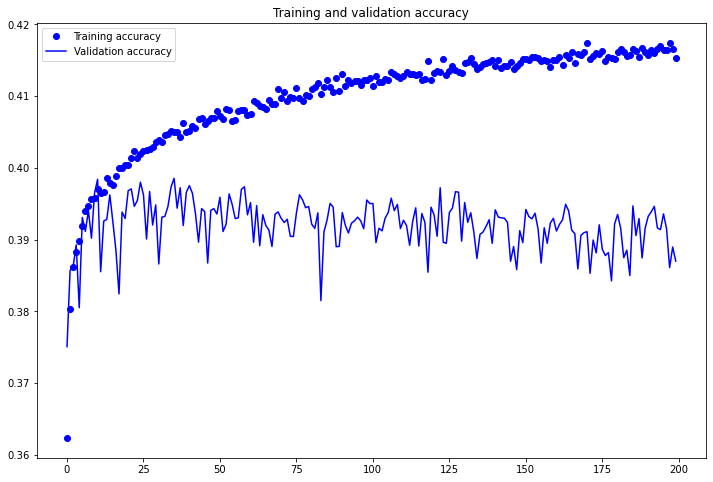

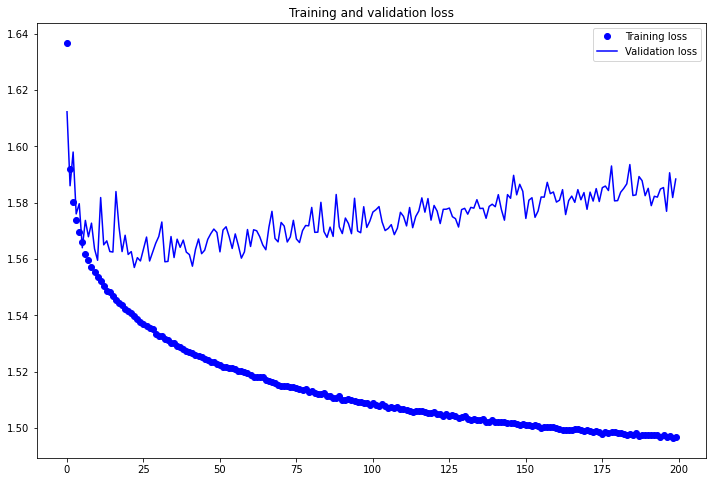

In [229]:
accuracy = cnn_train.history['accuracy']
val_accuracy = cnn_train.history['val_accuracy']
loss = cnn_train.history['loss']
val_loss = cnn_train.history['val_loss']
epochs = range(len(accuracy))
plt.figure(figsize=(12,8))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')

plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure(figsize=(12,8))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

### Model evaluation

#### validation data

In [232]:
cnn_model.evaluate(valid_X, valid_label)

1373/1373 [==============================] - 1s 546us/step - loss: 1.5884 - accuracy: 0.3870


[1.5884445905685425, 0.3869932293891907]

#### Training data

In [233]:
cnn_model.evaluate(train_X, train_label)

5492/5492 [==============================] - 3s 524us/step - loss: 1.4938 - accuracy: 0.4165


[1.4938411712646484, 0.4164940416812897]

###### - Inference

###### This score of 42% accuracy turned out to be the best so far. CNN model is doing better with the data. CNN is a specialized model so its expected to do well but we cant settle for 42%, its poor, we need to tune the model parameters towards better performance

###### -----------------------------------------------------------------------------------------------------------------------------------------------------------------

# Part 5

###### From the previous 4 parts, i have been understood the place of feature importance, data mining, machine learning and deep learning. I took so much time on the part 4 because the fact that even CNN model couldn't get the best out of this data. Then there has to be something unique about it, even on Kaggle, the highest accuracy score was about 42~45% . Having to understand more about the dataset, my Research question is "Why is it so difficult to model how long an individual will Stay in an  Hospital upon admission?"

###### -

###### We are going to look at the target from a different perspective. I am proposing to experiment with all variations of the RNN - Recurrent neural network. When we were exprimenting with different activation functions, tanh activation turned out to be the best. It got me wondering and i did some findings, tanh activation function has differnet points, -1, 0 and 1. These are different points that follow themselves and i got to see that tanh activation is mostly used with Recurrent neural network. Secondly, CNN being a specialized model could genralize well with the data gave more conviction that we need to try RNN whether GRU, LSTM or RNN. Even looking at the normal human life, the event of the past shape our future. Hence, we need to model this data with RNN variations

###### I plan on using Bi-directional LSTM , normal LSTM, GRU and RNN models during this research. as i dont want to eliminate the possibility of deriving new research questions by focusing solely on my research purpose.